In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
# Cargar datos
df = pd.read_csv('sample_data/data_sin_procesar.csv')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Constant_Column,Student_ID,Extracurricular,Parental_Involvement,Access_to_Resources
0,0.95822,3.4,8.2,53.0%,47.0,No definido,1,Yes,NaN,Low
1,0.85566,3.2,5.9,55.0%,35.0,No definido,2,NaN,Medium,Low
2,0.68025,3.2,9.3,41.0%,32.0,No definido,3,No,Low,Medium
3,0.25936,3.2,8.2,47.0%,34.0,No definido,4,No,Low,Low
4,0.60447,3.8,10.0,75.0%,33.0,No definido,5,Yes,Low,Low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Socioeconomic Score   1408 non-null   float64
 1   Study Hours           1349 non-null   float64
 2   Sleep Hours           1347 non-null   float64
 3   Attendance (%)        1330 non-null   object 
 4   Grades                1338 non-null   float64
 5   Constant_Column       1408 non-null   object 
 6   Student_ID            1408 non-null   int64  
 7   Extracurricular       1118 non-null   object 
 8   Parental_Involvement  1278 non-null   object 
 9   Access_to_Resources   1276 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 110.1+ KB


In [8]:
# numero de filas y de columnas
filas, columnas = df.shape
print("Numero de filas: ", filas)
print("Numero de columnas: ", columnas)

Numero de filas:  1408
Numero de columnas:  10


In [9]:
# informacion de variables categoricas
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols.tolist())

for col in cat_cols:
    print(df[col].unique())
    print(df[col].value_counts(dropna=False))

['Attendance (%)', 'Constant_Column', 'Extracurricular', 'Parental_Involvement', 'Access_to_Resources']
['53.0%' '55.0%' '41.0%' '47.0%' '75.0%' '63.0%' '67.0%' nan '61.0%'
 '80.0%' '43.0%' '51.0%' '68.0%' '60.0%' '74.0%' '69.0%' '70.0%' '78.0%'
 '65.0%' '66.0%' '52.0%' '40.0%' '58.0%' '45.0%' '56.0%' '49.0%' '77.0%'
 '42.0%' '84.0%' '72.0%' '62.0%' '46.0%' '73.0%' '54.0%' '64.0%' '44.0%'
 '100.0%' '50.0%' '57.0%' '82.0%' '48.0%' '59.0%' '79.0%' '71.0%' '76.0%'
 '83.0%' '81.0%' '86.0%' '89.0%' '90.0%' '87.0%' '92.0%' '98.0%' '85.0%'
 '88.0%' '99.0%' '93.0%' '96.0%' '94.0%' '95.0%' '97.0%']
Attendance (%)
NaN      78
51.0%    53
57.0%    52
55.0%    47
47.0%    45
         ..
99.0%     1
96.0%     1
94.0%     1
95.0%     1
97.0%     1
Name: count, Length: 61, dtype: int64
['No definido']
Constant_Column
No definido    1408
Name: count, dtype: int64
['Yes' nan 'No']
Extracurricular
Yes    579
No     539
NaN    290
Name: count, dtype: int64
[nan 'Medium' 'Low' 'High']
Parental_Involvement

In [11]:
# borrado de columnas
#identificamos las columnas con un solo valor
columnas_un_valor = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas con un solo valor:")
print(columnas_un_valor)

#eliminar las columnas inecesarias
columnas_eliminar = ['Constant_Column']
df_limpio = df.drop(columns=columnas_eliminar)

print(f"columnas eliminadas: {columnas_eliminar}")
print(f"Nueva forma del dataset: {df_limpio.shape}")


Columnas con un solo valor:
['Constant_Column']
columnas eliminadas: ['Constant_Column']
Nueva forma del dataset: (1408, 9)


In [12]:
# mostrar el nuemro faltante de las caracteristicas
# numero de valores faltantes por caracteristica
valores_faltantes =df_limpio.isnull().sum()
porcentaje_faltantes = (valores_faltantes / len(df_limpio)) * 100
print("Valores faltantes por caracteristica:")
print(valores_faltantes.sort_values(ascending=False))
print("\nPorcentaje de valores faltantes por caracteristica:")
print(porcentaje_faltantes.sort_values(ascending=False))

Valores faltantes por caracteristica:
Extracurricular         290
Access_to_Resources     132
Parental_Involvement    130
Attendance (%)           78
Grades                   70
Sleep Hours              61
Study Hours              59
Socioeconomic Score       0
Student_ID                0
dtype: int64

Porcentaje de valores faltantes por caracteristica:
Extracurricular         20.596591
Access_to_Resources      9.375000
Parental_Involvement     9.232955
Attendance (%)           5.539773
Grades                   4.971591
Sleep Hours              4.332386
Study Hours              4.190341
Socioeconomic Score      0.000000
Student_ID               0.000000
dtype: float64


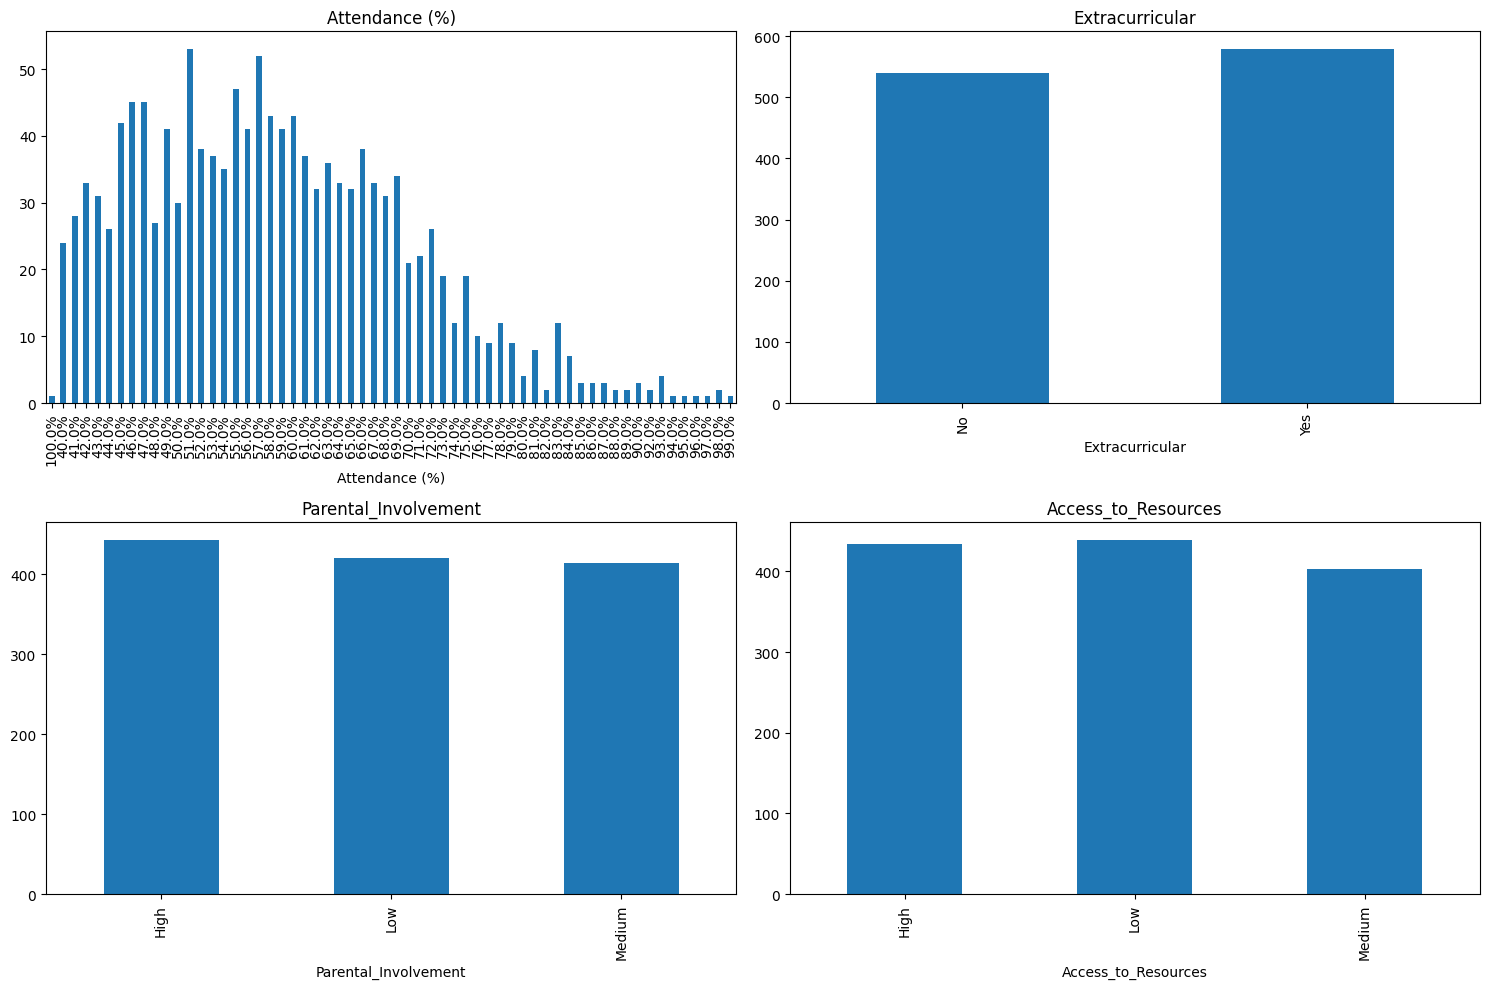

In [18]:
# representar el diagrama de barras de las caracteristicas categoricas

diagrama_barras=['Attendance (%)', 'Extracurricular', 'Parental_Involvement', 'Access_to_Resources']

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
axes = axes.flatten()

for i,col in enumerate(diagrama_barras):
    if col in  df_limpio.columns:
      df_limpio[col].value_counts().sort_index().plot(kind='bar',ax=axes[i],title=col)

plt.tight_layout()
plt.show()

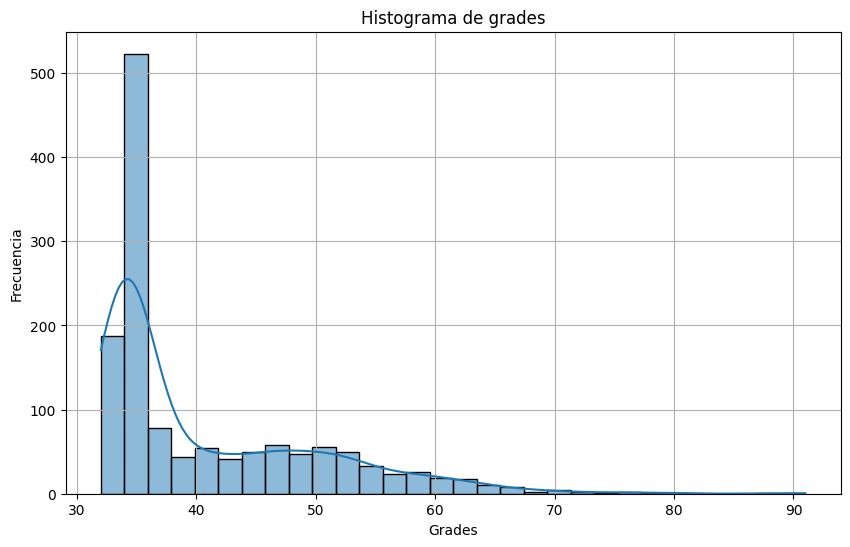

In [17]:
# representar histograma
# histograma del precio
plt.figure(figsize=(10, 6))
sns.histplot(df_limpio['Grades'], bins=30, kde=True)
plt.xlabel('Grades')
plt.ylabel('Frecuencia')
plt.title('Histograma de grades')
plt.grid(True)
plt.show()

In [19]:
# modificar el  formato de la columna Attendace
df_limpio['Attendance (%)'] = df_limpio['Attendance (%)'].str.replace('%', '', regex=False)
df_limpio['Attendance (%)'] = pd.to_numeric(df_limpio['Attendance (%)'], errors='coerce')

print("Primeras 5 filas del DataFrame con la columna 'Attendance (%)' modificada:")
print(df_limpio.head())

print("\nInformación del DataFrame después de la conversión de 'Attendance (%)':")
df_limpio.info()

Primeras 5 filas del DataFrame con la columna 'Attendance (%)' modificada:
   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades  \
0              0.95822          3.4          8.2            53.0    47.0   
1              0.85566          3.2          5.9            55.0    35.0   
2              0.68025          3.2          9.3            41.0    32.0   
3              0.25936          3.2          8.2            47.0    34.0   
4              0.60447          3.8         10.0            75.0    33.0   

   Student_ID Extracurricular Parental_Involvement Access_to_Resources  
0           1             Yes                  NaN                 Low  
1           2             NaN               Medium                 Low  
2           3              No                  Low              Medium  
3           4              No                  Low                 Low  
4           5             Yes                  Low                 Low  

Información del DataFrame des

In [20]:
# tartamiento de nulos
nuevo=df.copy()
print(f"filas duplicadas: {nuevo.duplicated().sum()}")
duplicadas = nuevo[nuevo.duplicated(keep=False)]
print("numero de filas duplicadas contando la primera fila vista",duplicadas.shape[0])
duplicadas.head()

nuevo=df.drop_duplicates()
print(f"filas duplicadas: {nuevo.duplicated().sum()}")
print("Forma despues de eliminar duplicados: ",nuevo.shape)

filas duplicadas: 15
numero de filas duplicadas contando la primera fila vista 30
filas duplicadas: 0
Forma despues de eliminar duplicados:  (1393, 10)


In [24]:
# imputacion  con SimpleImputer
# a. Moda para categóricas
modo_cols = ['Extracurricular', 'Parental_Involvement', 'Access_to_Resources']
imp_mod = SimpleImputer(strategy='most_frequent')
df[modo_cols] = imp_mod.fit_transform(df[modo_cols])

# b. Media
media_cols = ['Study Hours', 'Sleep Hours', 'Grades']
imp_media = SimpleImputer(strategy='mean')
df[media_cols] = imp_media.fit_transform(df[media_cols])

# c. 0.5
df['Socioeconomic Score'] = df['Socioeconomic Score'].fillna(0.5)

# d. 0 para Attendance (%)
df['Attendance (%)'] = df['Attendance (%)'].fillna(0)

# >>> aquí creas el nuevo DataFrame con TODOS los datos ya imputados
nuevo = df.copy()

# Si quieres ver una muestra:
print(nuevo.head())

   Socioeconomic Score  Study Hours  Sleep Hours Attendance (%)  Grades  \
0              0.95822          3.4          8.2          53.0%    47.0   
1              0.85566          3.2          5.9          55.0%    35.0   
2              0.68025          3.2          9.3          41.0%    32.0   
3              0.25936          3.2          8.2          47.0%    34.0   
4              0.60447          3.8         10.0          75.0%    33.0   

  Constant_Column  Student_ID Extracurricular Parental_Involvement  \
0     No definido           1             Yes                 High   
1     No definido           2             Yes               Medium   
2     No definido           3              No                  Low   
3     No definido           4              No                  Low   
4     No definido           5             Yes                  Low   

  Access_to_Resources  
0                 Low  
1                 Low  
2              Medium  
3                 Low  
4       

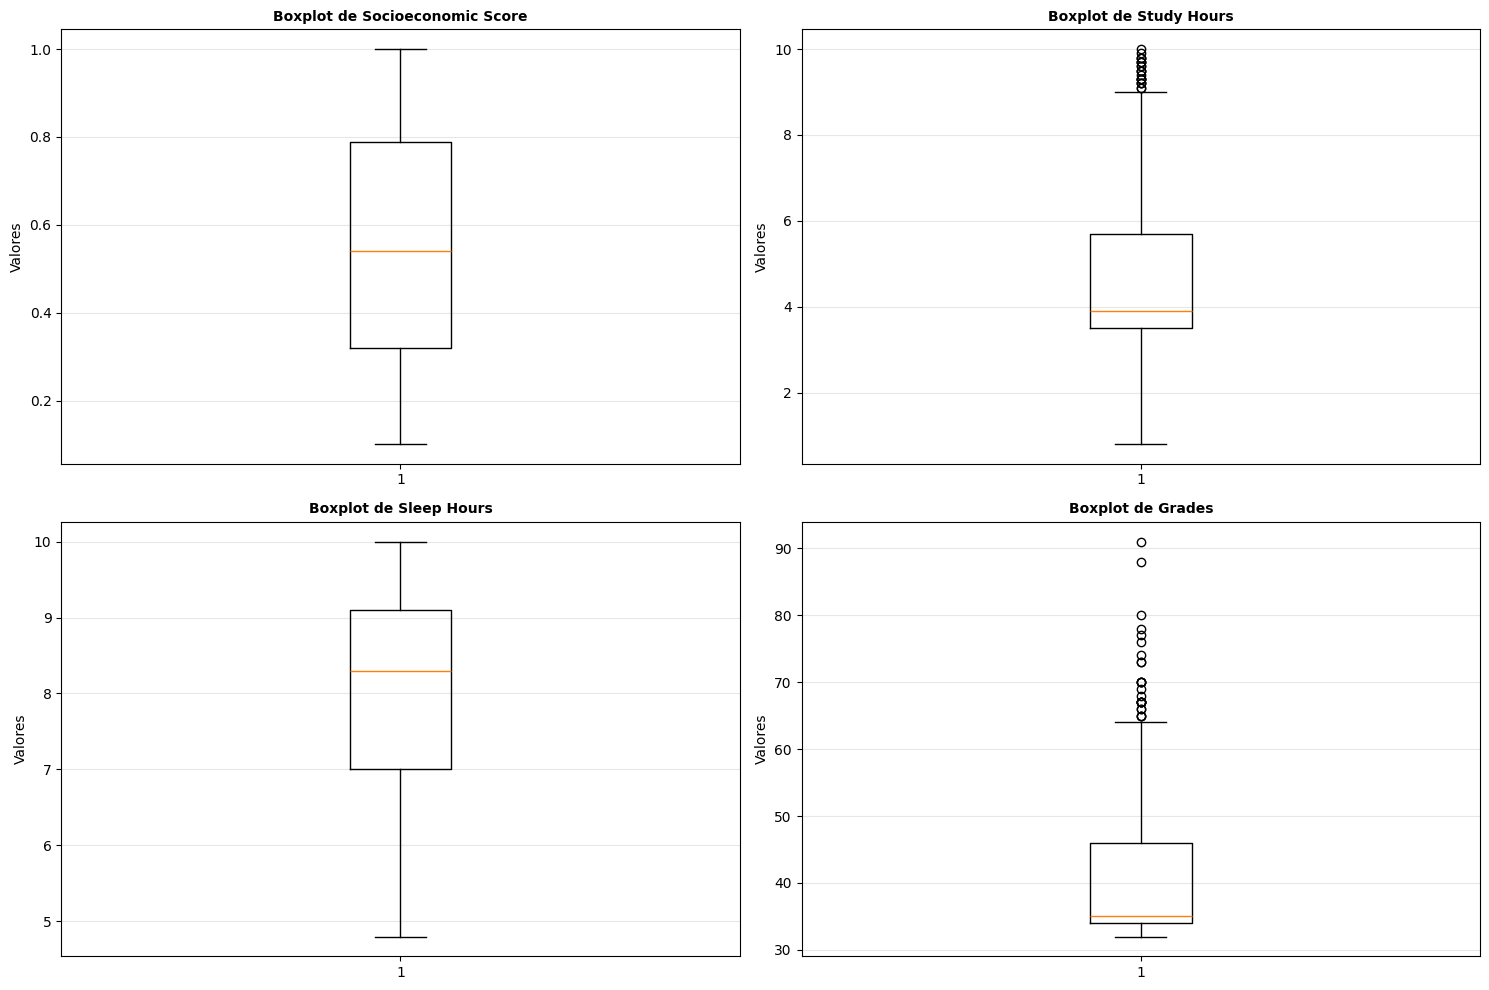

In [29]:
# tratamiento de outliers
columnas_numericas  = nuevo.select_dtypes(include=[np.number]).columns.tolist()

# si quieres centrarte solo en estas:
columnas_analizar = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)', 'Grades']
columnas_analizar = [col for col in columnas_analizar if col in columnas_numericas]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(columnas_analizar[:len(axes)]):
    axes[idx].boxplot(nuevo[col].dropna(), vert=True)
    axes[idx].set_title(f'Boxplot de {col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Valores')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



In [30]:
#detectarlos y borrar
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_mask = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
    return outliers_mask, limite_inferior, limite_superior

# 3. Detectar outliers en las columnas numéricas clave
columnas_outliers = columnas_analizar
indices_eliminar = set()

for col in columnas_outliers:
    if col in nuevo.columns:
        outliers_mask_for_col, lim_inf, lim_sup = detectar_outliers_iqr(nuevo, col)
        current_col_outlier_indices = nuevo[outliers_mask_for_col].index

        print(f"\n{col}:")
        print(f"  Límite inferior: {lim_inf:.2f}")
        print(f"  Límite superior: {lim_sup:.2f}")
        print(f"  Número de outliers: {len(current_col_outlier_indices)}")
        print(f"  Índices: {current_col_outlier_indices.tolist()[:10]}{'...' if len(current_col_outlier_indices) > 10 else ''}")

        indices_eliminar.update(current_col_outlier_indices)

print(f"\nTotal de índices a eliminar: {len(indices_eliminar)}")
print(f"Forma antes de eliminar outliers: {nuevo.shape}")

nuevo = nuevo.drop(indices_eliminar)
print(f"Forma después de eliminar outliers: {nuevo.shape}")


Socioeconomic Score:
  Límite inferior: -0.38
  Límite superior: 1.49
  Número de outliers: 0
  Índices: []

Study Hours:
  Límite inferior: 0.20
  Límite superior: 9.00
  Número de outliers: 23
  Índices: [11, 22, 37, 209, 218, 267, 295, 384, 394, 518]...

Sleep Hours:
  Límite inferior: 3.85
  Límite superior: 12.25
  Número de outliers: 0
  Índices: []

Grades:
  Límite inferior: 16.00
  Límite superior: 64.00
  Número de outliers: 26
  Índices: [37, 63, 73, 218, 223, 267, 367, 433, 518, 556]...

Total de índices a eliminar: 41
Forma antes de eliminar outliers: (1408, 10)
Forma después de eliminar outliers: (1367, 10)


In [34]:
# codificar columnas
cat_cols = ['Extracurricular', 'Parental_Involvement', 'Access_to_Resources']


ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe_data = ohe.fit_transform(nuevo[cat_cols])
ohe_df = pd.DataFrame(ohe_data,
                      columns=ohe.get_feature_names_out(cat_cols),
                      index=nuevo.index)

nuevo_codificado = pd.concat([nuevo.drop(columns=cat_cols), ohe_df], axis=1)
nuevo_codificado.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Constant_Column,Student_ID,Extracurricular_No,Extracurricular_Yes,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium
0,0.95822,3.4,8.2,53.0%,47.0,No definido,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.85566,3.2,5.9,55.0%,35.0,No definido,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.68025,3.2,9.3,41.0%,32.0,No definido,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.25936,3.2,8.2,47.0%,34.0,No definido,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.60447,3.8,10.0,75.0%,33.0,No definido,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
#estandarizar
print("Verificando tipos de datos antes de escalar:")
print(nuevo_codificado.dtypes)
print("\nValores únicos en Attendance (%):")
print(nuevo_codificado['Attendance (%)'].unique()[:10])  # Primeros 10

# Forzar conversión final de Attendance a numérico
nuevo_codificado['Attendance (%)'] = pd.to_numeric(nuevo_codificado['Attendance (%)'], errors='coerce')

# Comprobar si quedan columnas no numéricas
print("\nColumnas no numéricas restantes:")
non_numeric_cols = nuevo_codificado.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

# Solo columnas numéricas para escalar
num_cols = nuevo_codificado.select_dtypes(include=[np.number]).columns
nuevo_num = nuevo_codificado[num_cols].copy()

print(f"\nEscalado {len(num_cols)} columnas numericas: {list(num_cols)}")

# Ahora sí escalar
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(nuevo_num)

nuevo_escalado = pd.DataFrame(datos_escalados,columns=num_cols,index=nuevo_codificado.index)


print(nuevo_escalado.head())
nuevo_escalado.to_csv('final_cleaned_scaled.csv', index=False)

Verificando tipos de datos antes de escalar:
Socioeconomic Score            float64
Study Hours                    float64
Sleep Hours                    float64
Attendance (%)                  object
Grades                         float64
Constant_Column                 object
Student_ID                       int64
Extracurricular_No             float64
Extracurricular_Yes            float64
Parental_Involvement_High      float64
Parental_Involvement_Low       float64
Parental_Involvement_Medium    float64
Access_to_Resources_High       float64
Access_to_Resources_Low        float64
Access_to_Resources_Medium     float64
dtype: object

Valores únicos en Attendance (%):
['53.0%' '55.0%' '41.0%' '47.0%' '75.0%' '63.0%' '67.0%' 0 '61.0%' '43.0%']

Columnas no numéricas restantes:
Index(['Constant_Column'], dtype='object')

Escalado 14 columnas numericas: ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)', 'Grades', 'Student_ID', 'Extracurricular_No', 'Extracurricular_